In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
df = pd.read_excel("C:\\Users\\user\\Desktop\\machine\\data_1017.xlsx",sheet_name="Sheet1")

In [3]:
label_encoder = LabelEncoder()

# 'fixed_type'을 숫자형으로 변환
df['fixed_type_encoded'] = label_encoder.fit_transform(df['fixed_type'])

print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'D1': 4, 'D2': 5, 'E': 6, 'M': 7, 'M1': 8, 'M2': 9, 'Ma': 10, 'Mb': 11, 'Mc': 12, 'R': 13, 'X': 14}


In [4]:
df = df.drop(['fixed_type','ht_omr_data','FG'], axis=1)

In [5]:
df

,sex,sc_code,age,t1,t2,t3,t4,t5,t6,t7,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,fixed_type_encoded
0,1,3,32,48,55,57,54,46,59,60,...,44,62,37,49,53,51,46,39,61,0
1,1,1,39,61,56,61,60,50,57,55,...,42,41,30,39,43,54,44,57,41,2
2,1,4,39,46,36,51,52,46,52,49,...,43,55,47,44,44,48,45,43,65,7
3,2,3,34,46,54,46,61,48,59,52,...,44,41,36,46,44,40,46,41,57,7
4,1,2,34,37,39,46,50,44,57,64,...,42,45,46,42,43,42,44,41,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,44,51,51,56,58,57,49,...,43,41,41,44,51,53,45,58,53,0
30867,1,1,29,43,53,43,49,43,46,45,...,52,80,60,55,60,45,57,47,38,7
30868,2,1,38,45,35,53,42,44,45,54,...,51,47,64,52,43,41,43,40,39,0
30869,2,1,18,43,51,50,44,51,52,49,...,45,41,40,50,42,50,46,42,45,0


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
from joblib import Parallel, delayed
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, roc_curve, auc

In [7]:
X = df.iloc[:,:-1]

y = df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                     test_size = 0.2, random_state = 1000)

In [8]:
def modeling_uncustomized_parallel(algorithm, x_train, y_train, x_test, y_test, n_jobs=-1):
    # 병렬처리로 하이퍼파라미터 조정 없이 모델 학습
    def fit_model(algorithm, x_train, y_train):
        model = algorithm(random_state=1000)
        model.fit(x_train, y_train)
        return model
    
    # 병렬 처리로 모델 학습
    models = Parallel(n_jobs=n_jobs)(delayed(fit_model)(algorithm, x_train, y_train) for _ in range(1))

    # 각 모델에 대해 train/test 정확도 계산
    for model in models:
        # Train Data 설명력
        train_score_before = round(model.score(x_train, y_train), 3)
        print(f"학습 데이터셋 정확도: {train_score_before}")

        # Test Data 설명력
        test_score_before = round(model.score(x_test, y_test), 3)
        print(f"테스트 데이터셋 정확도: {test_score_before}")

    return train_score_before, test_score_before


In [9]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시
    plt.savefig('C:\\Users\\user\\Desktop\\machine\\figure\\' + algorithm_name + '_' + filename + '.png') # 시각화한 그래프는 로컬에 저장

In [10]:
def model_fit_and_score(algorithm, x_train, y_train, x_test, y_test, n_estimators):
    model = algorithm(n_estimators=n_estimators, random_state=1000)
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return n_estimators, train_score, test_score

def optimi_estimator_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max, n_jobs=-1):
    para_n_tree = [n_tree * 5 for n_tree in range(n_estimator_min, n_estimator_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score)(algorithm, x_train, y_train, x_test, y_test, n_estimators) 
        for n_estimators in para_n_tree
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['n_estimators', 'TrainScore', 'TestScore'])
    
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['n_estimators'], df_score_n['TrainScore'], df_score_n['TestScore'], "The number of estimator", "n_estimator")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [11]:
def model_fit_and_score_max_depth(algorithm, x_train, y_train, x_test, y_test, max_depth, n_estimator):
    # 의사결정나무 모델의 경우 n_estimators를 설정하지 않음
    if algorithm == DTC:
        model = algorithm(max_depth=max_depth, random_state=1000)
    else:
        model = algorithm(max_depth=max_depth, n_estimators=n_estimator, random_state=1000)
    
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return max_depth, train_score, test_score

def optimi_maxdepth_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator, n_jobs=-1):
    para_depth = [depth for depth in range(depth_min, depth_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score_max_depth)(algorithm, x_train, y_train, x_test, y_test, max_depth, n_estimator) 
        for max_depth in para_depth
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['depth', 'TrainScore', 'TestScore'])
    
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['depth'], df_score_n['TrainScore'], df_score_n['TestScore'], "The number of depth", "n_depth")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [12]:
def model_fit_and_score_min_split(algorithm, x_train, y_train, x_test, y_test, min_samples_split, n_estimator, n_depth):
    # 의사결정나무 모델의 경우 n_estimators를 설정하지 않음
    if algorithm == DTC:
        model = algorithm(min_samples_split=min_samples_split, max_depth=n_depth, random_state=1000)
    else:
        model = algorithm(min_samples_split=min_samples_split, n_estimators=n_estimator, max_depth=n_depth, random_state=1000)
    
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return min_samples_split, train_score, test_score

def optimi_minsplit_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth, n_jobs=-1):
    para_split = [n_split * 2 for n_split in range(n_split_min, n_split_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score_min_split)(algorithm, x_train, y_train, x_test, y_test, min_samples_split, n_estimator, n_depth) 
        for min_samples_split in para_split
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['min_samples_split', 'TrainScore', 'TestScore'])
    
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['min_samples_split'], df_score_n['TrainScore'], df_score_n['TestScore'], "The minimum number of samples required to split an internal node", "min_samples_split")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [13]:
def model_fit_and_score_min_leaf(algorithm, x_train, y_train, x_test, y_test, min_samples_leaf, n_estimator, n_depth, n_split):
    # 의사결정나무 모델의 경우 n_estimators를 설정하지 않음
    if algorithm == DTC:
        model = algorithm(min_samples_leaf=min_samples_leaf, max_depth=n_depth, min_samples_split=n_split, random_state=1000)
    else:
        model = algorithm(min_samples_leaf=min_samples_leaf, n_estimators=n_estimator, max_depth=n_depth, min_samples_split=n_split, random_state=1000)
    
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    return min_samples_leaf, train_score, test_score

def optimi_minleaf_parallel(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split, n_jobs=-1):
    para_leaf = [n_leaf * 2 for n_leaf in range(n_leaf_min, n_leaf_max)]
    
    # 병렬 처리를 사용하여 모델을 학습하고 성능을 평가
    results = Parallel(n_jobs=n_jobs)(
        delayed(model_fit_and_score_min_leaf)(algorithm, x_train, y_train, x_test, y_test, min_samples_leaf, n_estimator, n_depth, n_split) 
        for min_samples_leaf in para_leaf
    )

    # 결과를 정리하여 데이터프레임으로 저장
    df_score_n = pd.DataFrame(results, columns=['min_samples_leaf', 'TrainScore', 'TestScore'])
    
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, df_score_n['min_samples_leaf'], df_score_n['TrainScore'], df_score_n['TestScore'], "The minimum number of samples required to be at a leaf node", "min_samples_leaf")

    # 성능 결과 출력
    print(df_score_n.round(4))



In [14]:
def model_final(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1000, 
                          min_samples_leaf=n_leaf,
                          min_samples_split=n_split, 
                          max_depth=n_depth)
    else:
        model = algorithm(random_state=1000, 
                          n_estimators=n_estimator, 
                          min_samples_leaf=n_leaf,
                          min_samples_split=n_split, 
                          max_depth=n_depth)
    
    # 모델 학습
    model.fit(x_train, y_train)
    
    # 모델 저장
    model_path = 'C:\\Users\\user\\Desktop\\machine\\'
    model_filename = 'omr_' + algorithm_name + '.pkl'
    with open(model_path + model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"최종 모델 저장 완료! 파일 경로: {model_path + model_filename}\n")
    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")  # 정확도

    # 추가된 성능 지표들
    from sklearn.metrics import cohen_kappa_score
    # Cohen's Kappa
    kappa = cohen_kappa_score(y_test, y_pred)
    print(f"Cohen's Kappa: {kappa:.3f}")

    # Matthews Correlation Coefficient (MCC)
    from sklearn.metrics import matthews_corrcoef
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"Matthews Correlation Coefficient: {mcc:.3f}")

    # Balanced Accuracy
    from sklearn.metrics import balanced_accuracy_score
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Balanced Accuracy: {balanced_acc:.3f}")

    # Precision, Recall, F1-Score 계산 방식 추가
    for avg_type in ['macro', 'micro', 'weighted']:
        print(f"\nPerformance metrics ({avg_type}):")
        print(f"Precision ({avg_type}): {precision_score(y_test, y_pred, average=avg_type):.3f}")
        print(f"Recall ({avg_type}): {recall_score(y_test, y_pred, average=avg_type):.3f}")
        print(f"F1-score ({avg_type}): {f1_score(y_test, y_pred, average=avg_type):.3f}")

    plt.figure(figsize=(15, 15))
    cm_display = ConfusionMatrixDisplay.from_estimator(
        model, x_test, y_test, cmap='Blues', include_values=True, display_labels=None
    )

    # 텍스트 크기 조정을 위해 annot_kws 추가
    cm_display.ax_.set_title('Confusion Matrix', fontsize=10)  # 제목 크기 조정
    cm_display.ax_.tick_params(axis='both', which='major', labelsize=7)  # 축 레이블 크기 조정
    for text in cm_display.text_.ravel():
        text.set_fontsize(7)  # 행렬 내 텍스트 크기 조정

    # 이미지 저장
    plt.savefig(model_path + 'figure\\' + algorithm_name + '_confusion_matrix.png')
    plt.show()

    # ROC 커브 계산 (다중 클래스)
    if hasattr(model, "predict_proba"):  # 예측 확률값이 있는 경우에만 계산
        y_pred_prob = model.predict_proba(x_test)
        
        unique_classes = model.classes_
        
        # 각 클래스에 대해 y_test에 실제로 존재하는지 확인하고, 2개 이상의 클래스가 존재할 때만 AUC 계산
        if len(np.unique(y_test)) > 1:
            try:
                roc_auc = roc_auc_score(y_test, y_pred_prob, labels=unique_classes, multi_class='ovr', average='weighted')
                print(f"ROC AUC (weighted): {roc_auc:.3f}")
            except ValueError as e:
                print(f"ROC AUC could not be calculated: {str(e)}")
        else:
            print("Warning: Only one class present in y_test. ROC AUC score cannot be computed.")

        # ROC 커브 시각화
        plt.figure(figsize=(10, 8))
        for i in range(len(model.classes_)):
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, i], pos_label=i)
            plt.plot(fpr, tpr, label=f'Class {model.classes_[i]} (area = {auc(fpr, tpr):.3f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 대각선 기준선
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{algorithm_name} ROC Curve (multi-class)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig(model_path + 'figure\\' + algorithm_name + '_roc_curve.png')  # ROC 그래프 저장
        plt.show()
    
    return model  # model을 반환


In [15]:
algorithm = RFC
algorithm_name = 'rfc'

In [16]:
train_acc_before, test_acc_before = modeling_uncustomized_parallel(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.901


    n_estimators  TrainScore  TestScore
0              5      0.9840     0.8394
1             10      0.9954     0.8764
2             15      0.9984     0.8849
3             20      0.9993     0.8907
4             25      0.9995     0.8934
..           ...         ...        ...
94           475      1.0000     0.9038
95           480      1.0000     0.9046
96           485      1.0000     0.9041
97           490      1.0000     0.9043
98           495      1.0000     0.9045

[99 rows x 3 columns]


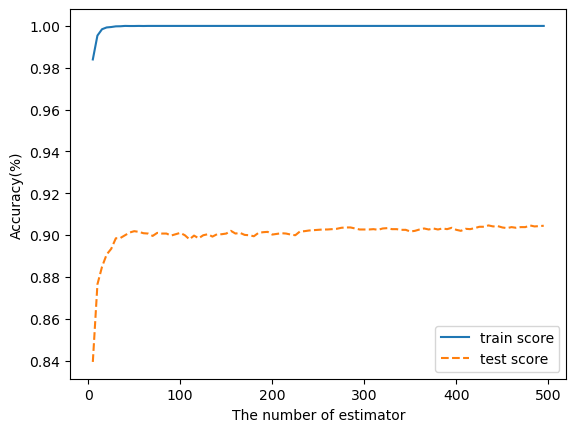

In [16]:
n_estimator_min = 1
n_estimator_max = 100
optimi_estimator_parallel(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

In [21]:
n_estimator = 100

    depth  TrainScore  TestScore
0       1      0.4400     0.4481
1       2      0.5210     0.5310
2       3      0.5307     0.5398
3       4      0.6107     0.6162
4       5      0.6725     0.6766
..    ...         ...        ...
94     95      1.0000     0.9011
95     96      1.0000     0.9011
96     97      1.0000     0.9011
97     98      1.0000     0.9011
98     99      1.0000     0.9011

[99 rows x 3 columns]


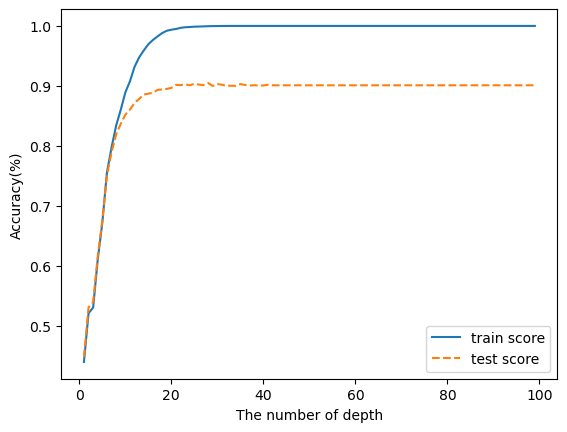

In [22]:
depth_min = 1
depth_max = 100
optimi_maxdepth_parallel(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

In [23]:
n_depth = 20

    min_samples_split  TrainScore  TestScore
0                   2      0.9937     0.8967
1                   4      0.9887     0.8968
2                   6      0.9811     0.8975
3                   8      0.9778     0.8957
4                  10      0.9734     0.8962
5                  12      0.9701     0.8947
6                  14      0.9678     0.8972
7                  16      0.9652     0.8944
8                  18      0.9635     0.8949
9                  20      0.9595     0.8933
10                 22      0.9576     0.8952
11                 24      0.9547     0.8925
12                 26      0.9517     0.8943
13                 28      0.9493     0.8926
14                 30      0.9485     0.8921
15                 32      0.9454     0.8925
16                 34      0.9429     0.8917
17                 36      0.9408     0.8943
18                 38      0.9387     0.8943
19                 40      0.9383     0.8920
20                 42      0.9360     0.8881
21        

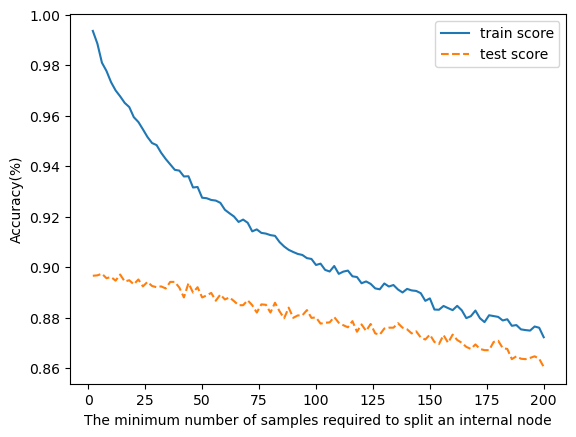

In [24]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit_parallel(algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

In [25]:
n_split = 10

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9687     0.8972
1                  4      0.9613     0.8912
2                  6      0.9510     0.8871
3                  8      0.9376     0.8858
4                 10      0.9257     0.8829
5                 12      0.9176     0.8779
6                 14      0.9077     0.8740
7                 16      0.9003     0.8672
8                 18      0.8981     0.8714
9                 20      0.8926     0.8662
10                22      0.8862     0.8640
11                24      0.8834     0.8635
12                26      0.8802     0.8633
13                28      0.8782     0.8615
14                30      0.8734     0.8596
15                32      0.8683     0.8543
16                34      0.8700     0.8544
17                36      0.8655     0.8513
18                38      0.8617     0.8486
19                40      0.8606     0.8525
20                42      0.8584     0.8494
21                44      0.8564

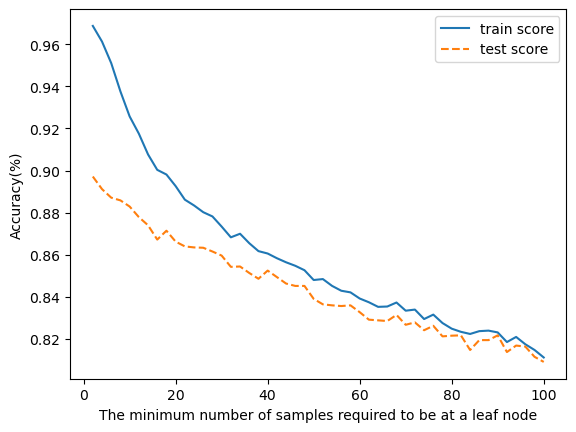

In [26]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf_parallel(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

In [27]:
n_leaf = 2

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 파라미터 범위를 랜덤 탐색에 적합하게 설정
param_distributions = {
    'n_estimators': np.arange(1, 1001, 2),  # 1에서 1000까지 2단위로 랜덤 선택
    'max_depth': np.arange(1, 101, 2),      # 1에서 100까지 2단위로 랜덤 선택
    'min_samples_split': np.arange(1, 51, 2),   # 1에서 50까지 2단위로 랜덤 선택
    'min_samples_leaf': np.arange(1, 51, 1)     # 1에서 50까지 랜덤 선택
}

# 병렬 처리를 위해 n_jobs=-1 설정 (모든 코어 사용)
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=1000), 
    param_distributions=param_distributions, 
    n_iter=50,  # 50번의 랜덤 조합을 탐색
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    random_state=1000, 
    verbose=2  # 현재 진행 상황을 출력하는 verbosity 설정
)

# 모델 학습
random_search.fit(x_train, y_train)

# 최적의 파라미터 출력
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 915, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_depth': 43}


In [21]:
n_estimator = 915 
n_depth = 43
n_split = 11
n_leaf = 1

최종 모델 저장 완료! 파일 경로: C:\Users\user\Desktop\machine\omr_rfc.pkl

Accuracy: 0.904
Cohen's Kappa: 0.869
Matthews Correlation Coefficient: 0.869
Balanced Accuracy: 0.515

Performance metrics (macro):
Precision (macro): 0.555
Recall (macro): 0.515
F1-score (macro): 0.531

Performance metrics (micro):
Precision (micro): 0.904
Recall (micro): 0.904
F1-score (micro): 0.904

Performance metrics (weighted):
Precision (weighted): 0.896
Recall (weighted): 0.904
F1-score (weighted): 0.900


<Figure size 1500x1500 with 0 Axes>

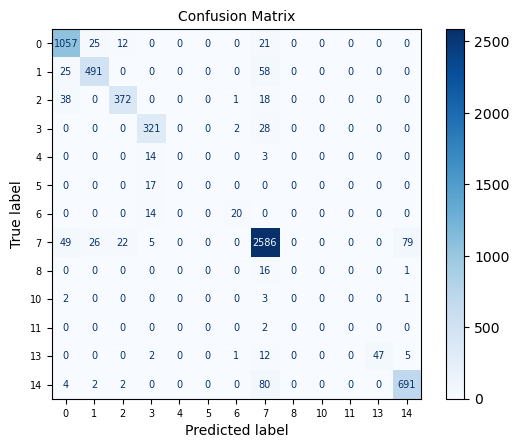

ROC AUC could not be calculated: Only one class present in y_true. ROC AUC score is not defined in that case.


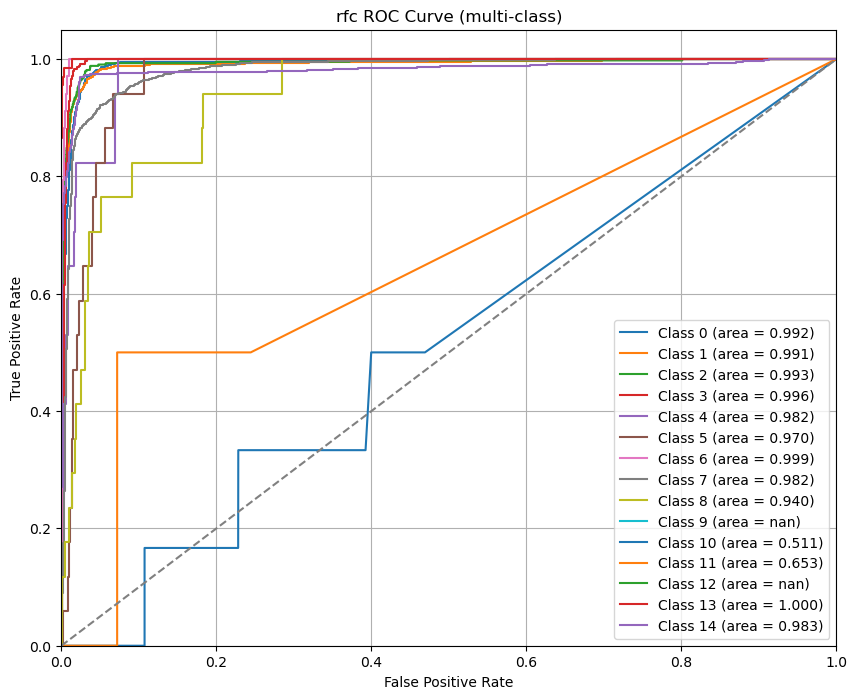

RandomForestClassifier(max_depth=43, min_samples_split=11, n_estimators=915,
                       random_state=1000)

In [22]:
model_final(algorithm, algorithm_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)

In [32]:
df

,sex,sc_code,age,t1,t2,t3,t4,t5,t6,t7,...,t19,t20,t21,t22,t23,t24,t25,t26,t27,fixed_type_encoded
0,1,3,32,48,55,57,54,46,59,60,...,44,62,37,49,53,51,46,39,61,0
1,1,1,39,61,56,61,60,50,57,55,...,42,41,30,39,43,54,44,57,41,2
2,1,4,39,46,36,51,52,46,52,49,...,43,55,47,44,44,48,45,43,65,7
3,2,3,34,46,54,46,61,48,59,52,...,44,41,36,46,44,40,46,41,57,7
4,1,2,34,37,39,46,50,44,57,64,...,42,45,46,42,43,42,44,41,41,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30866,1,3,39,44,51,51,56,58,57,49,...,43,41,41,44,51,53,45,58,53,0
30867,1,1,29,43,53,43,49,43,46,45,...,52,80,60,55,60,45,57,47,38,7
30868,2,1,38,45,35,53,42,44,45,54,...,51,47,64,52,43,41,43,40,39,0
30869,2,1,18,43,51,50,44,51,52,49,...,45,41,40,50,42,50,46,42,45,0


                         sex             sc_code                  age  \
                        mean       std      mean       std       mean   
fixed_type_encoded                                                      
0                   1.506726  0.500179  2.755157  0.696334  28.785650   
1                   1.494774  0.500409  2.782230  0.660238  28.195122   
2                   1.522145  0.500093  2.717949  0.718370  30.055944   
3                   1.524217  0.500126  2.857550  0.602086  27.581197   
4                   1.470588  0.514496  2.647059  0.785905  25.058824   
5                   1.529412  0.514496  2.823529  0.727607  25.117647   
6                   1.411765  0.499554  2.794118  0.591834  25.764706   
7                   1.524033  0.499512  2.825443  0.627373  28.230213   
8                   1.000000  0.000000  1.411765  0.507300  24.352941   
10                  1.500000  0.547723  2.833333  0.408248  33.166667   
11                  2.000000  0.000000  3.000000  0

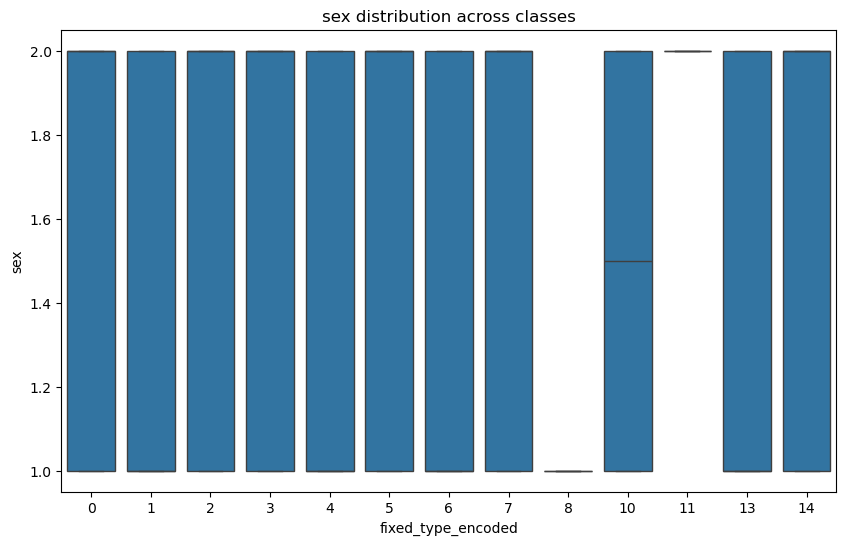

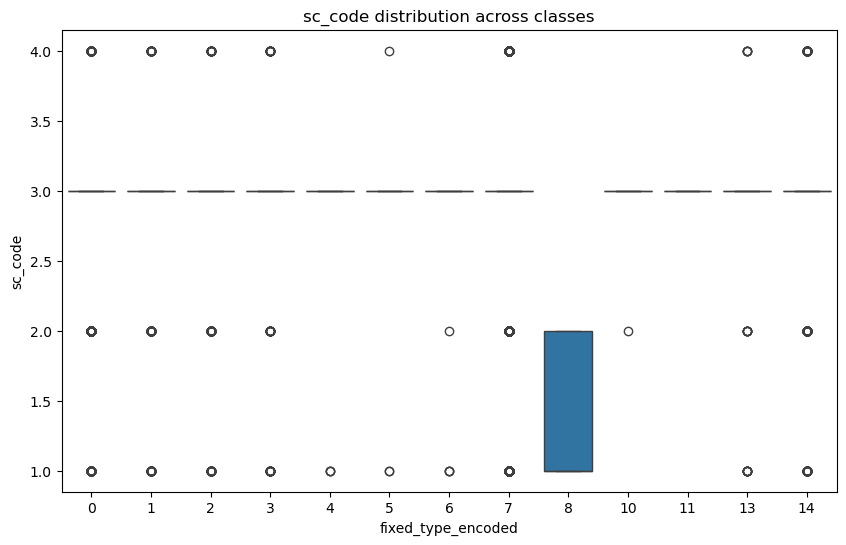

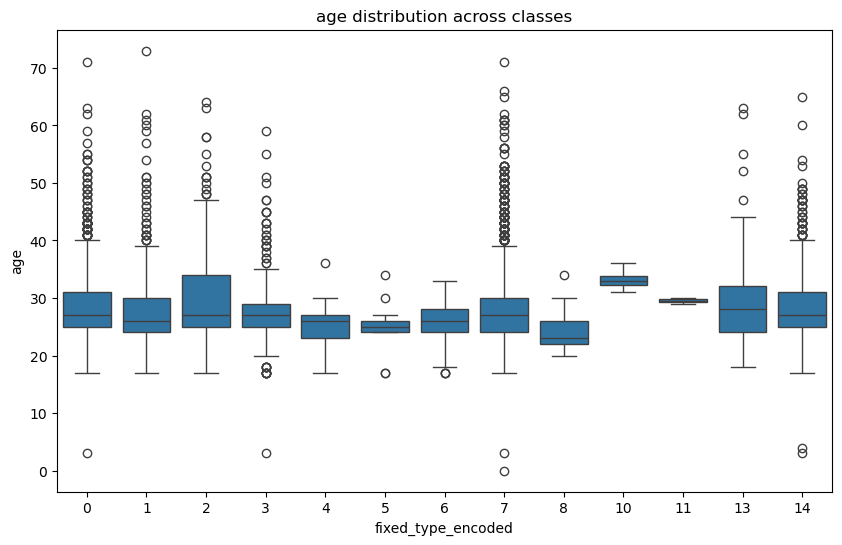

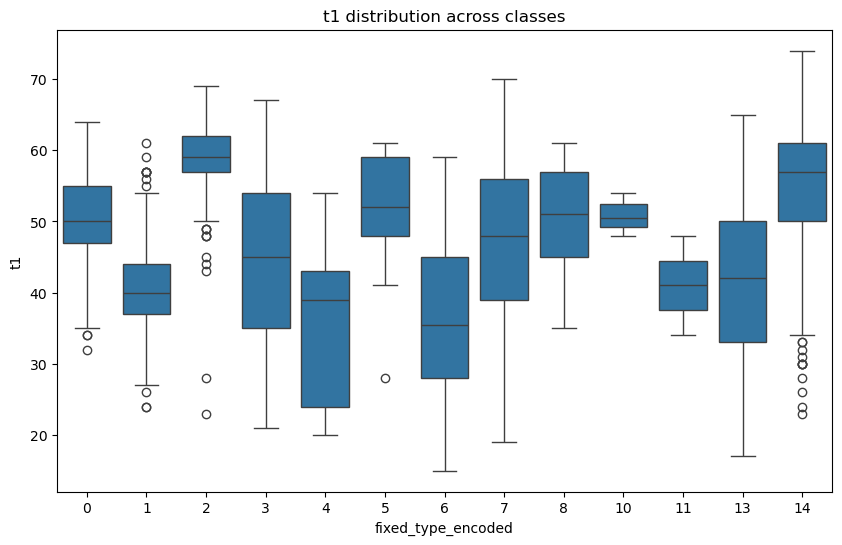

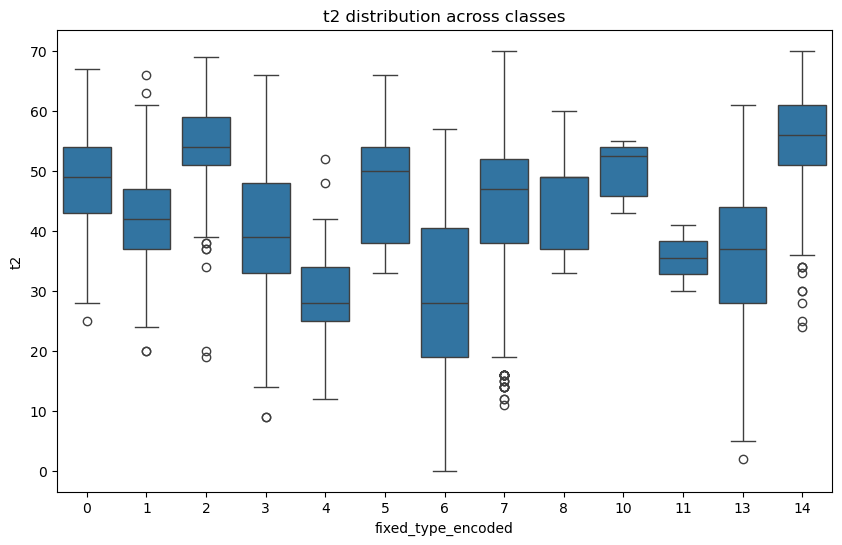

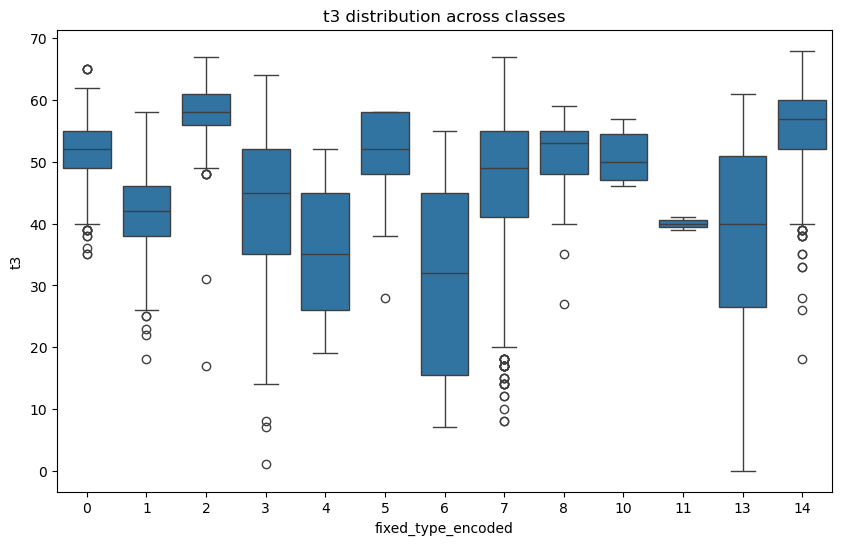

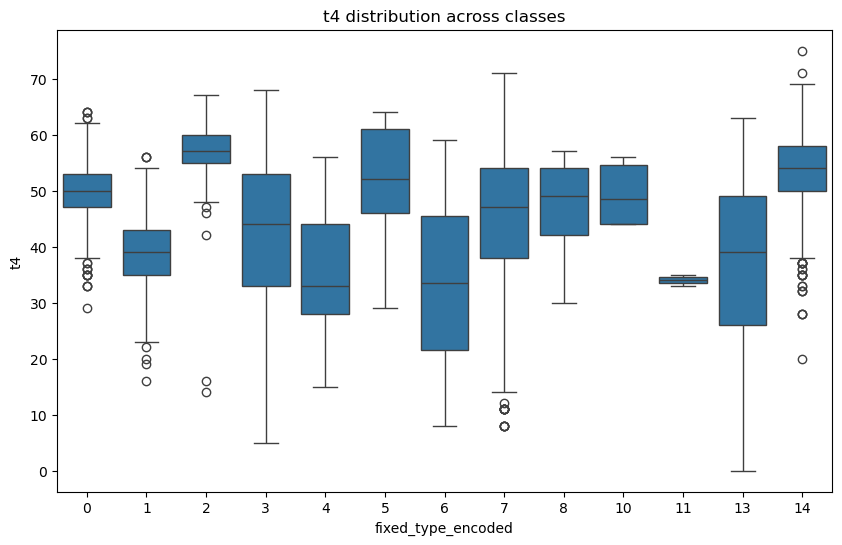

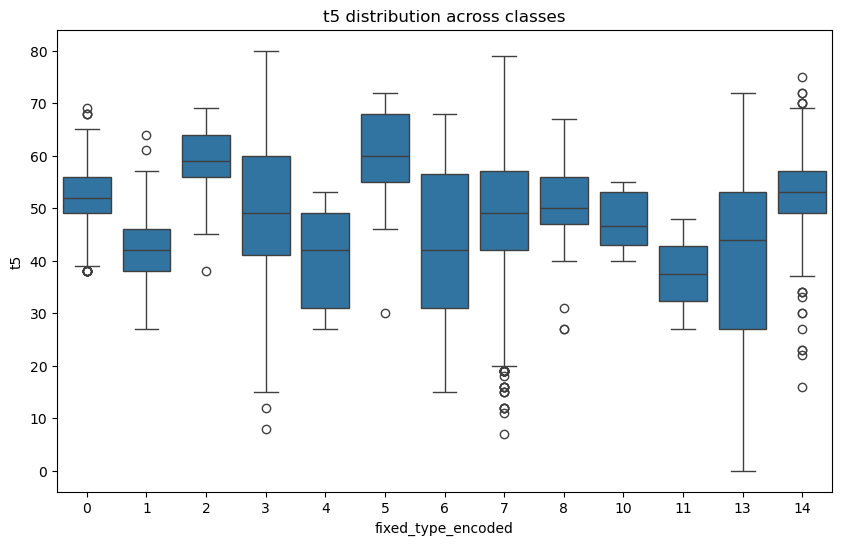

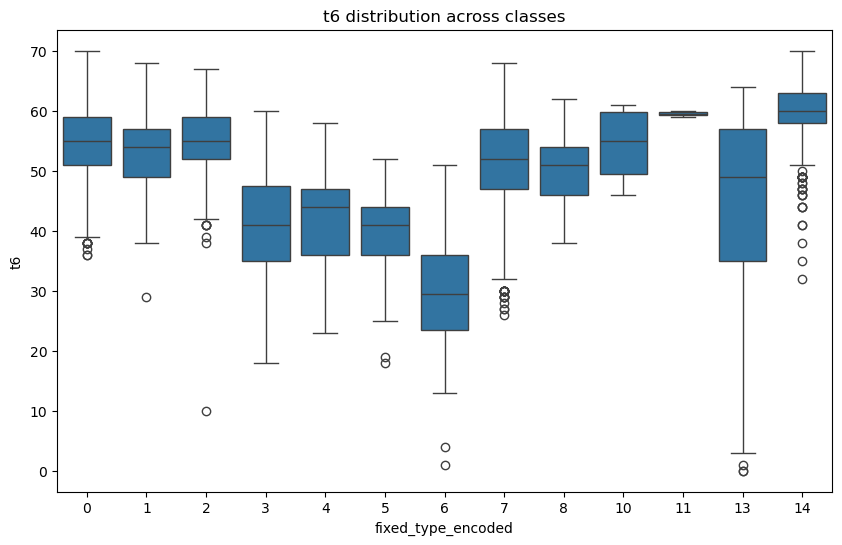

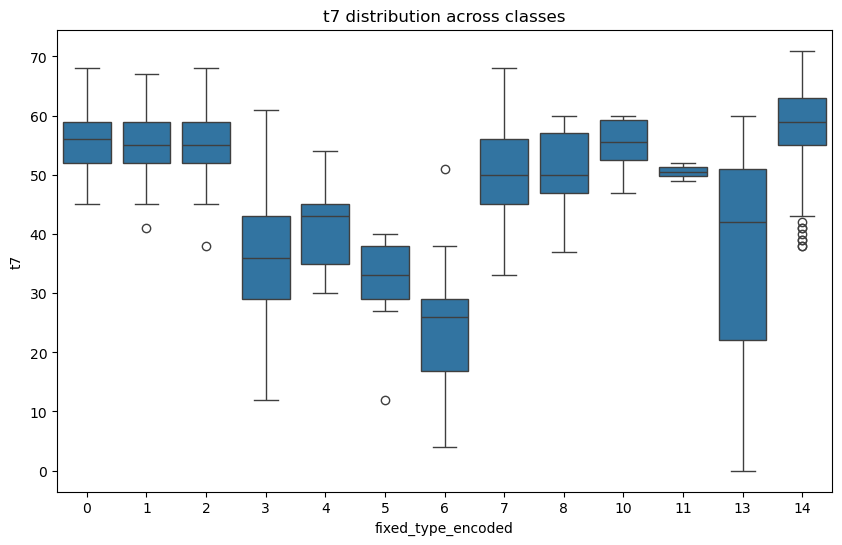

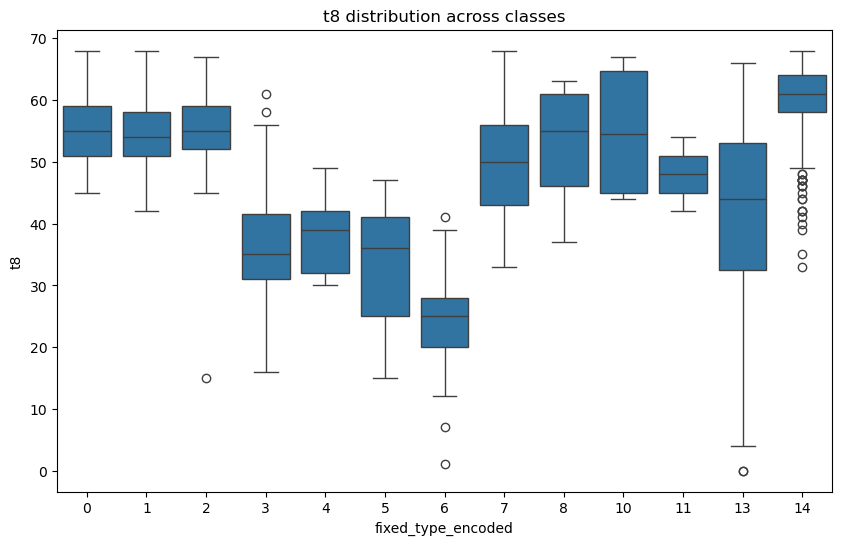

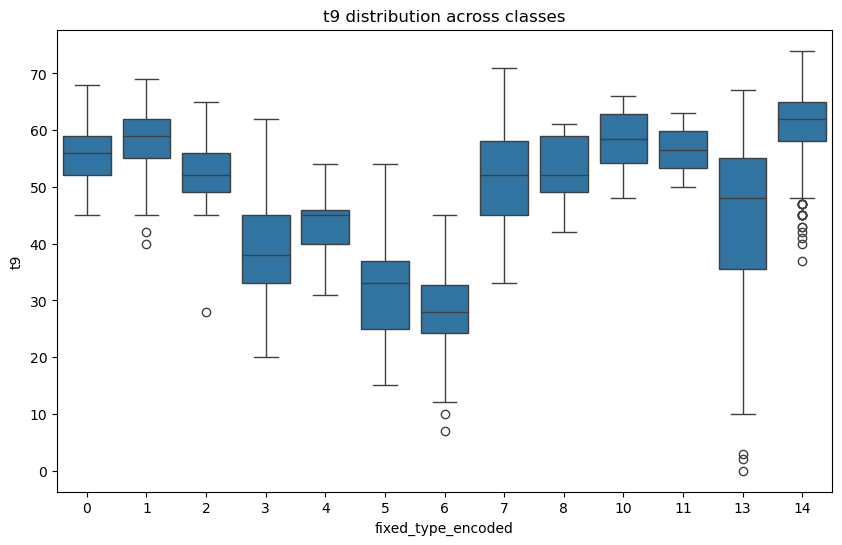

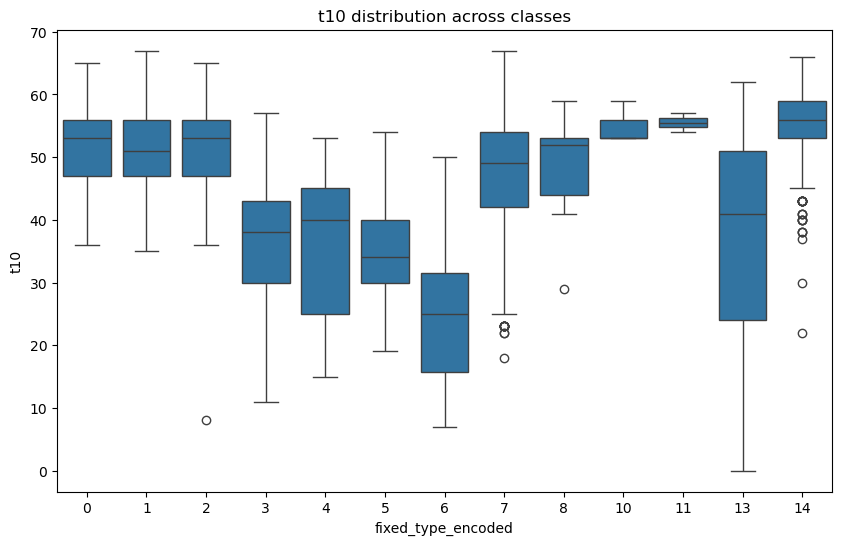

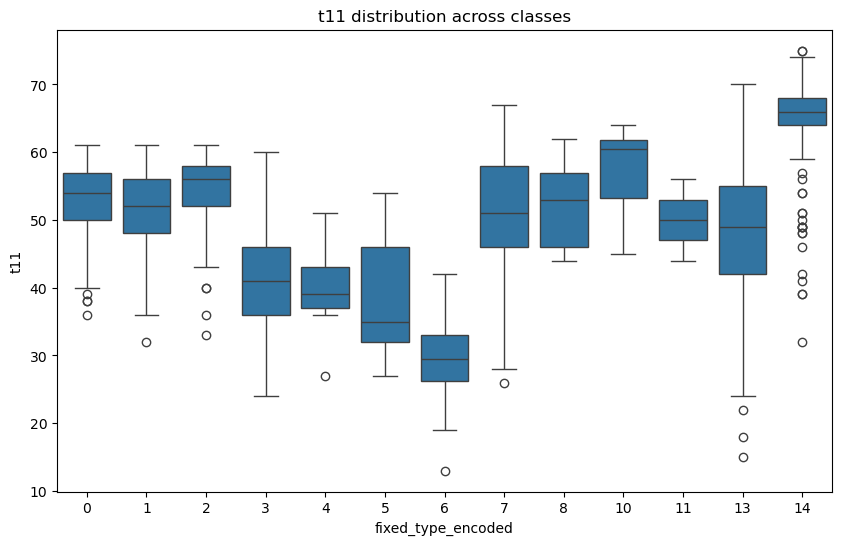

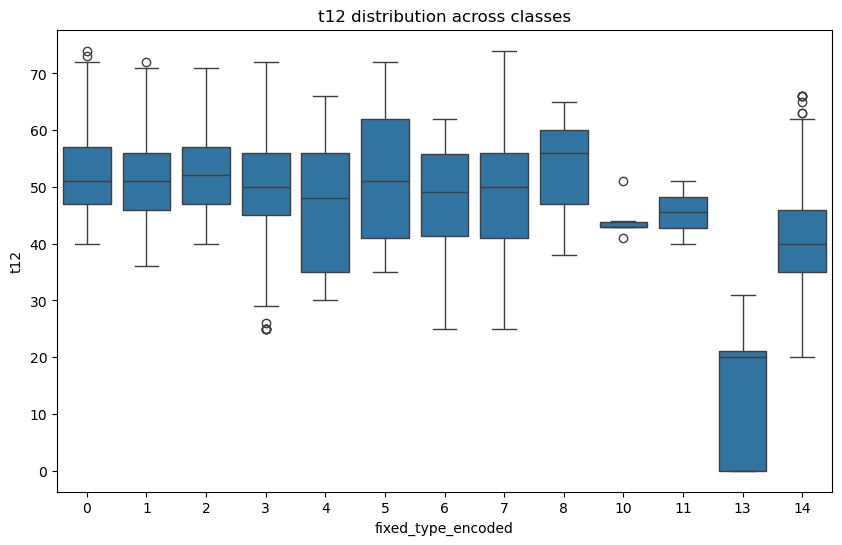

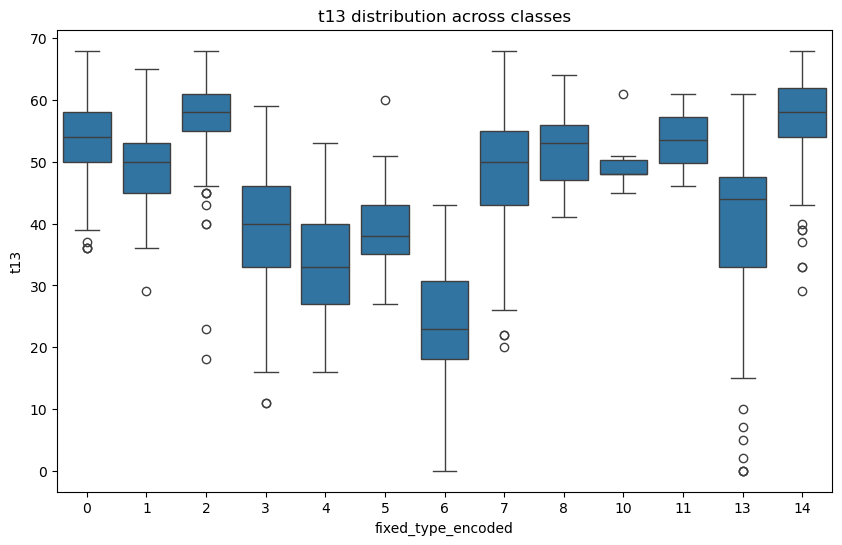

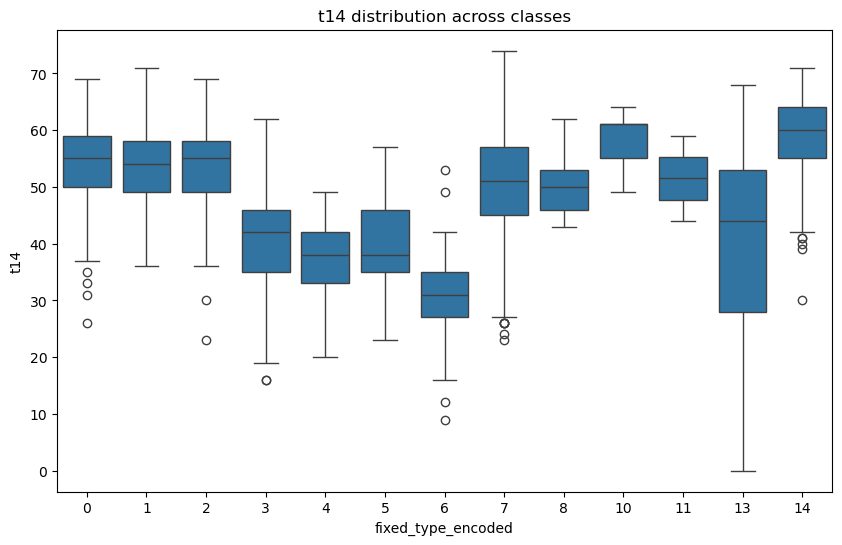

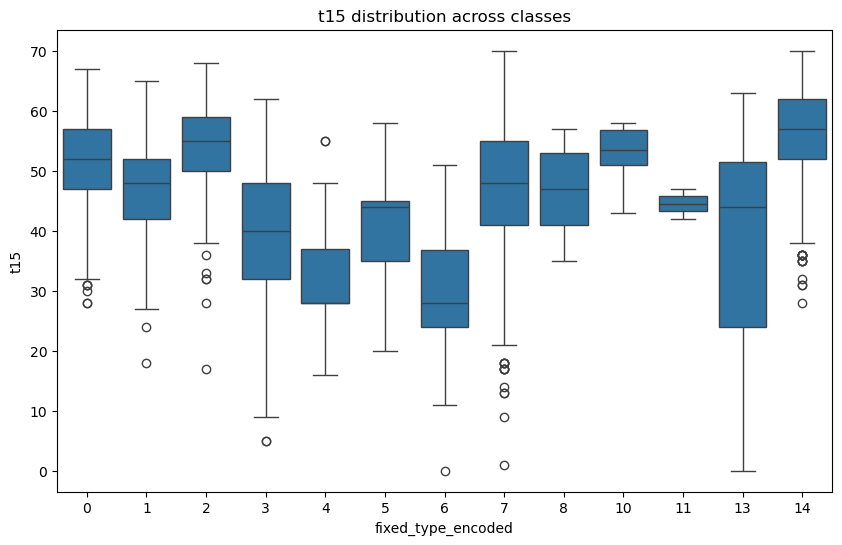

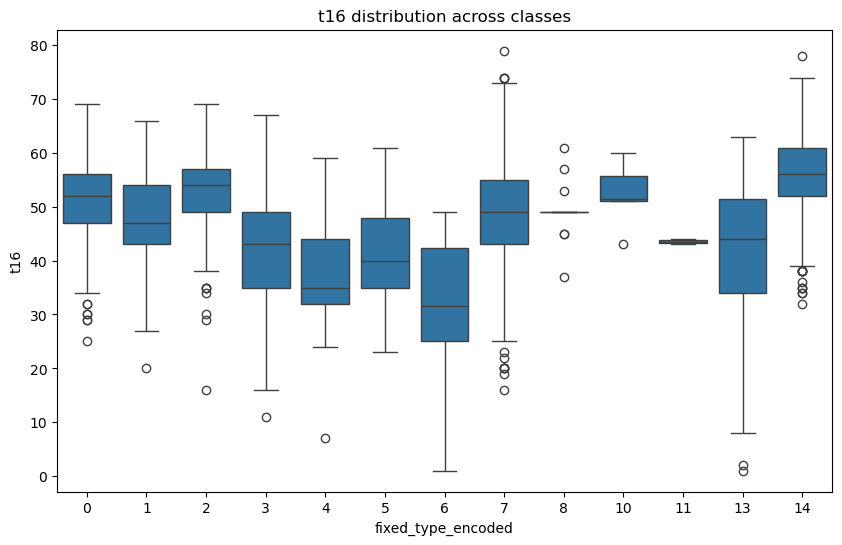

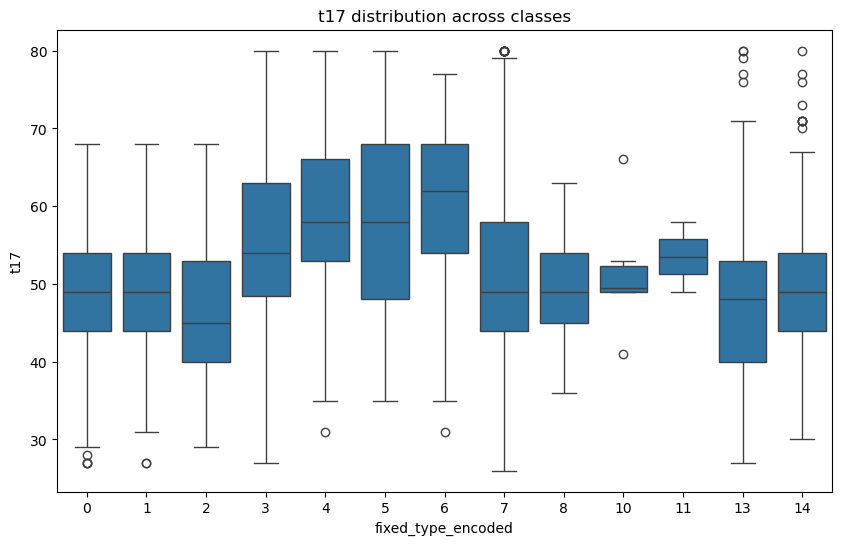

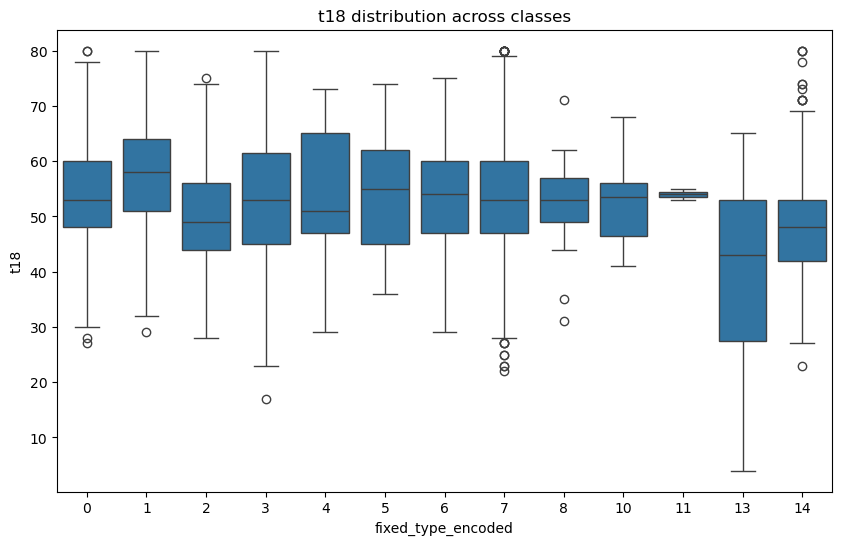

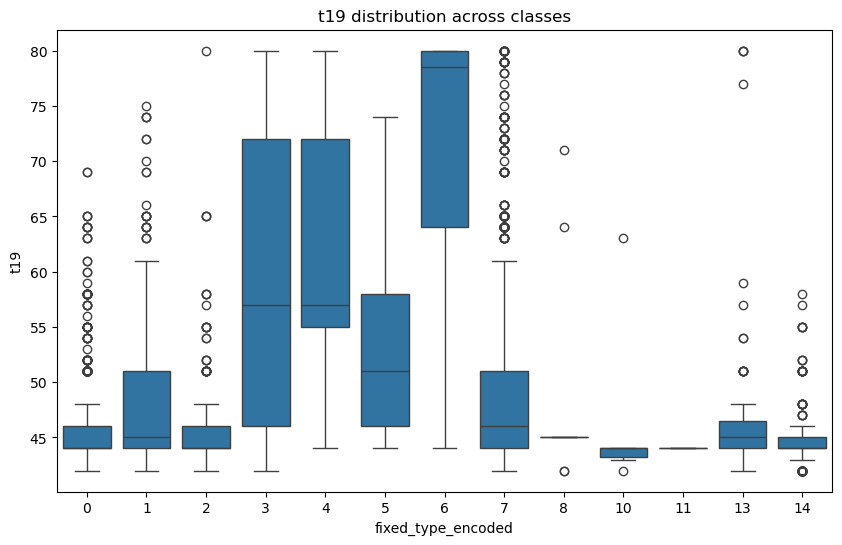

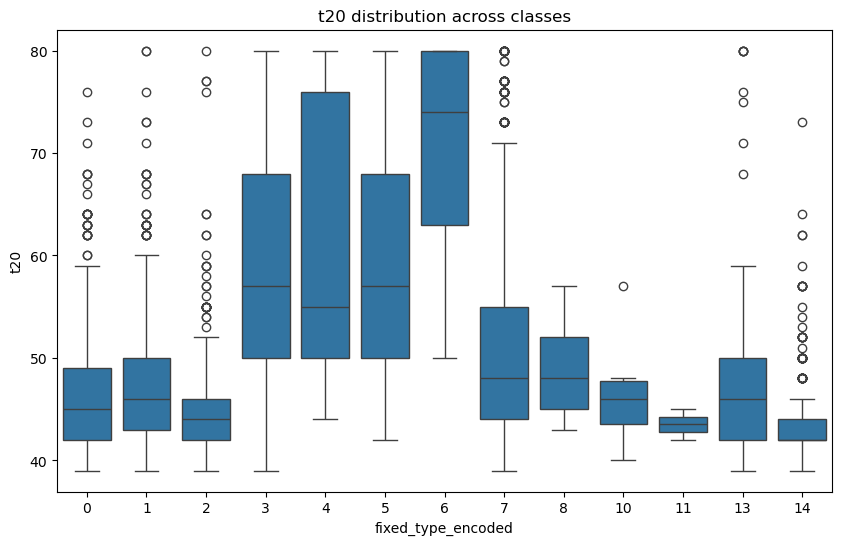

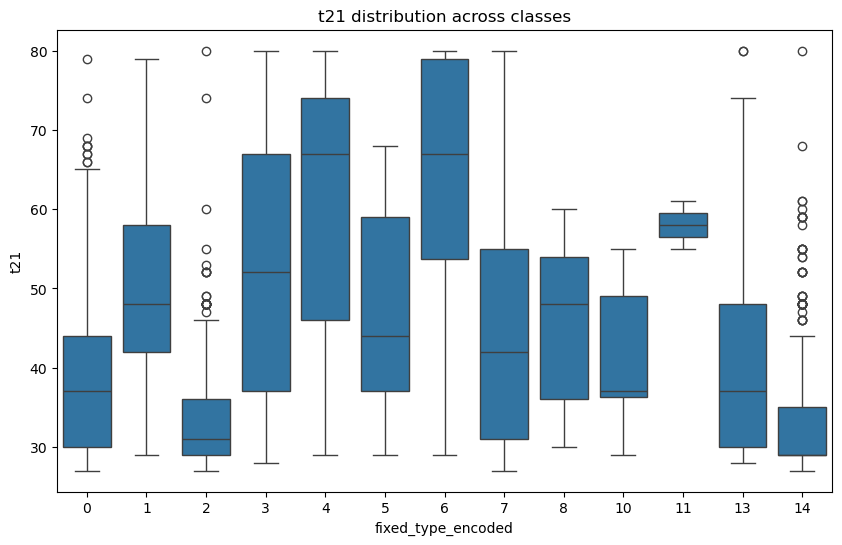

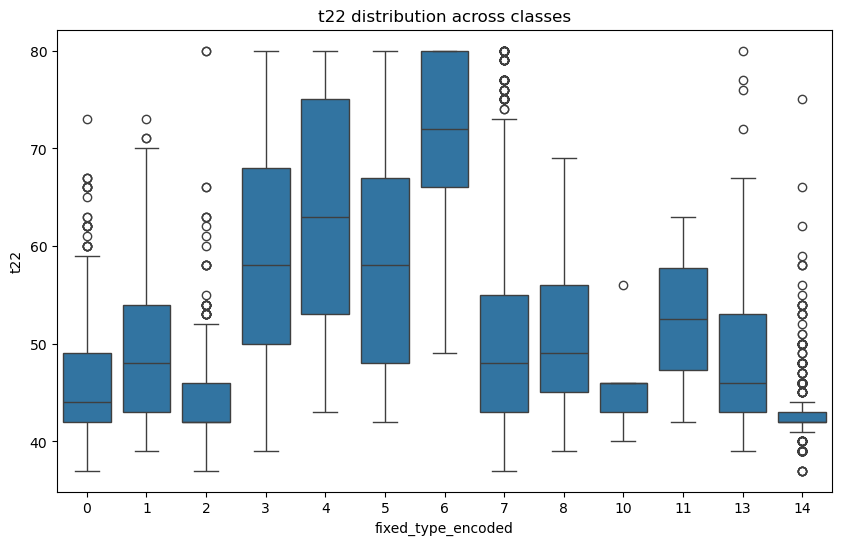

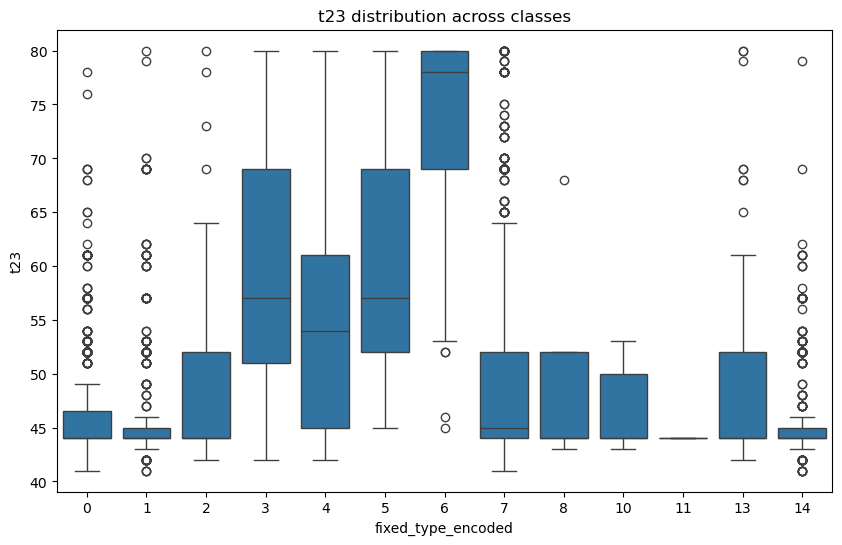

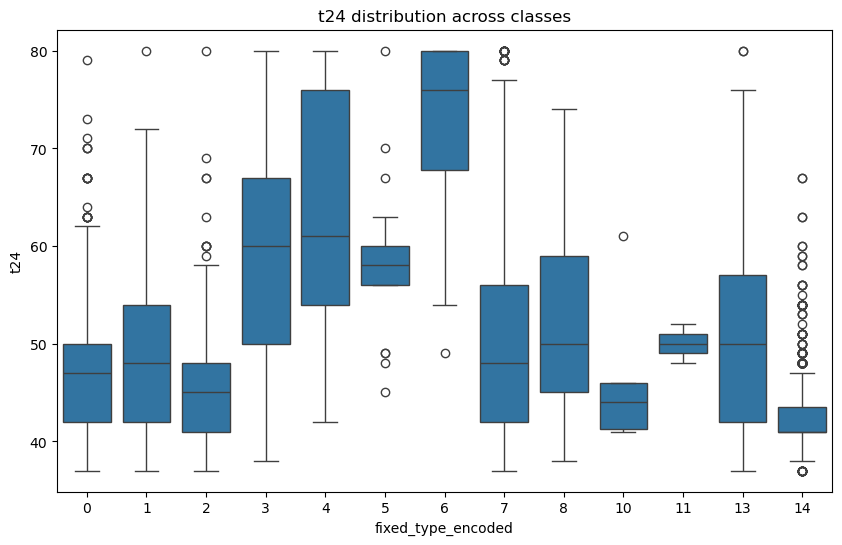

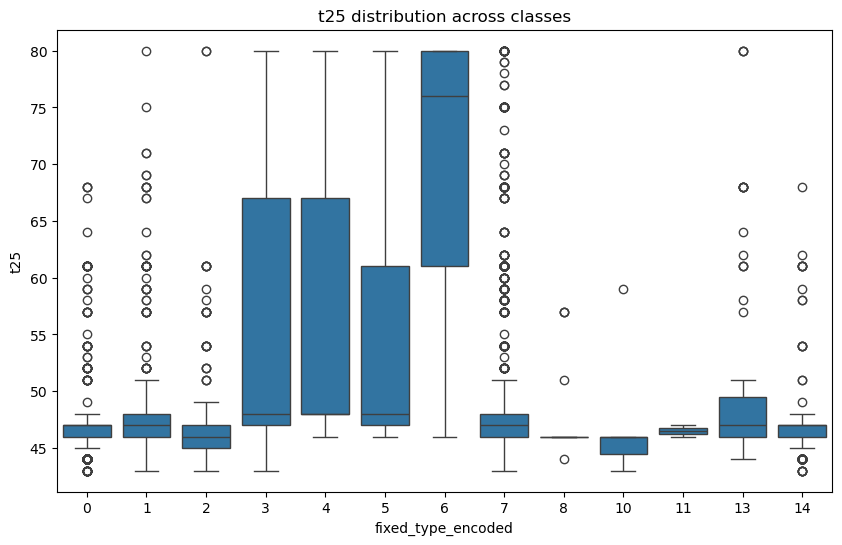

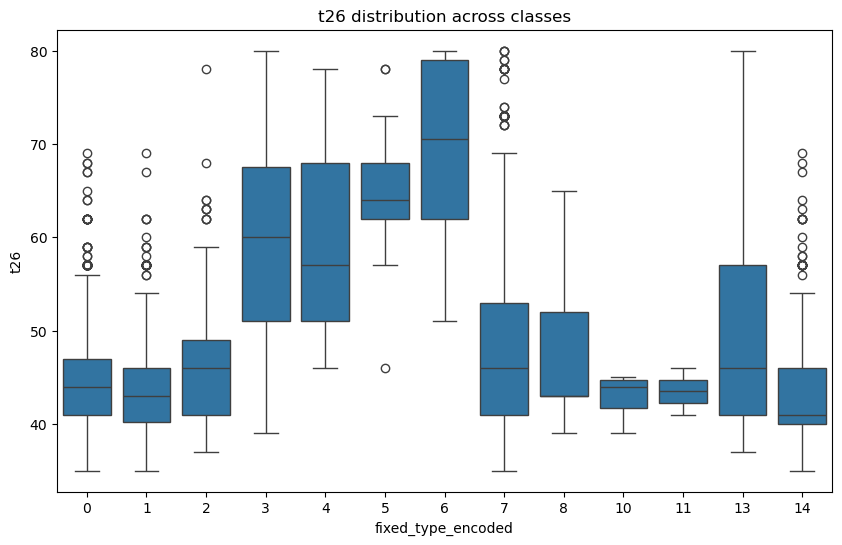

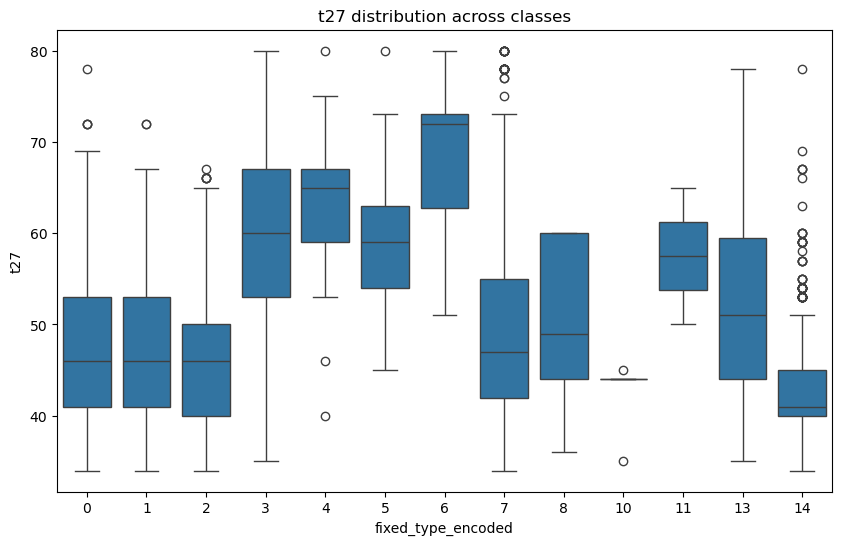

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 클래스별 기술 통계 테이블 생성
def create_class_statistics_table(x_test, y_test):
    df_combined = pd.concat([x_test, y_test], axis=1)  # 독립 변수와 종속 변수를 결합
    stats_table = df_combined.groupby(y_test.name).agg(['mean', 'std'])  # mean과 std만 추출
    return stats_table

# 2. 클래스별로 독립 변수 분포를 시각화 (박스플롯 사용)
def plot_class_distributions_boxplot(x_test, y_test, class_column_name):
    df_combined = pd.concat([x_test, y_test], axis=1)  # 독립 변수와 종속 변수를 결합
    for column in x_test.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=class_column_name, y=column, data=df_combined)
        plt.title(f'{column} distribution across classes')
        plt.show()

# 3. 함수 실행: 클래스별 기술 통계 테이블 생성 및 박스플롯 출력
stats_table = create_class_statistics_table(x_test, y_test)
print(stats_table)  # 기술 통계 테이블 출력

# 박스플롯을 사용해 클래스별로 독립 변수의 분포 시각화
plot_class_distributions_boxplot(x_test, y_test, 'fixed_type_encoded')


In [40]:
stats_table

sex             sc_code                  age  \
                        mean       std      mean       std       mean   
fixed_type_encoded                                                      
0                   1.506726  0.500179  2.755157  0.696334  28.785650   
1                   1.494774  0.500409  2.782230  0.660238  28.195122   
2                   1.522145  0.500093  2.717949  0.718370  30.055944   
3                   1.524217  0.500126  2.857550  0.602086  27.581197   
4                   1.470588  0.514496  2.647059  0.785905  25.058824   
5                   1.529412  0.514496  2.823529  0.727607  25.117647   
6                   1.411765  0.499554  2.794118  0.591834  25.764706   
7                   1.524033  0.499512  2.825443  0.627373  28.230213   
8                   1.000000  0.000000  1.411765  0.507300  24.352941   
10                  1.500000  0.547723  2.833333  0.408248  33.166667   
11                  2.000000  0.000000  3.000000  0.000000  29.500000   
13                  1.462687  0.502369  2.731343  0.750396  30.507463   
14                  1.525032  0.499694  2.839538  0.615714  28.362003   

                                     t1                    t2             ...  \
                         std       mean        std       mean        std  ...   
fixed_type_encoded                                                        ...   
0                   6.811502  50.400000   5.908002  49.169507   6.936553  ...   
1                   6.556260  40.456446   5.834903  41.714286   7.789681  ...   
2                   7.603900  58.916084   4.861872  54.097902   7.040253  ...   
3                   5.848916  44.222222  11.422868  40.327635  11.419447  ...   
4                   4.709971  35.529412  10.441011  30.470588  10.799986  ...   
5                   3.935136  51.705882   8.914628  47.352941  10.711799  ...   
6                   4.243061  37.294118  11.968467  29.441176  14.342544  ...   
7                   6.432989  47.273943  10.400622  45.334658  10.849861  ...   
8                   3.656179  49.529412   8.449243  45.411765   8.239075  ...   
10                  1.722401  50.833333   2.316607  50.166667   5.344779  ...   
11                  0.707107  41.000000   9.899495  35.500000   7.778175  ...   
13                  9.101071  41.805970  11.931927  35.985075  13.121221  ...   
14                  6.218588  55.021823   7.975753  54.702182   7.439119  ...   

                          t23                   t24                   t25  \
                         mean        std       mean        std       mean   
fixed_type_encoded                                                          
0                   46.428700   4.844724  47.033184   6.154196  46.954260   
1                   46.628920   5.653762  48.430314   6.850525  47.942509   
2                   47.055944   5.432822  45.722611   5.624128  46.757576   
3                   58.111111  11.540818  59.994302  11.026201  56.296296   
4                   54.882353  11.406590  63.000000  11.937336  58.529412   
5                   60.058824  12.572145  58.294118   8.629634  54.058824   
6                   71.411765  11.252253  72.588235   8.770189  69.735294   
7                   49.571377   7.900540  50.409830   8.964646  48.780629   
8                   48.470588   6.355290  52.058824  10.767257  48.117647   
10                  46.666667   4.546061  46.166667   7.626707  47.333333   
11                  44.000000   0.000000  50.000000   2.828427  46.500000   
13                  49.119403   9.820391  51.746269  10.798910  51.179104   
14                  45.722721   3.998410  42.853659   4.246474  46.725289   

                                     t26                   t27             
                          std       mean        std       mean        std  
fixed_type_encoded                                                         
0                    3.012343  44.860987   5.623867  46.517489   7.082383  
1                    4

최종 모델 저장 완료! 파일 경로: C:\Users\user\Desktop\machine\omr_rfc.pkl

Accuracy: 0.904
Cohen's Kappa: 0.869
Matthews Correlation Coefficient: 0.869
Balanced Accuracy: 0.515

Performance metrics (macro):
Precision (macro): 0.555
Recall (macro): 0.515
F1-score (macro): 0.531

Performance metrics (micro):
Precision (micro): 0.904
Recall (micro): 0.904
F1-score (micro): 0.904

Performance metrics (weighted):
Precision (weighted): 0.896
Recall (weighted): 0.904
F1-score (weighted): 0.900


<Figure size 1500x1500 with 0 Axes>

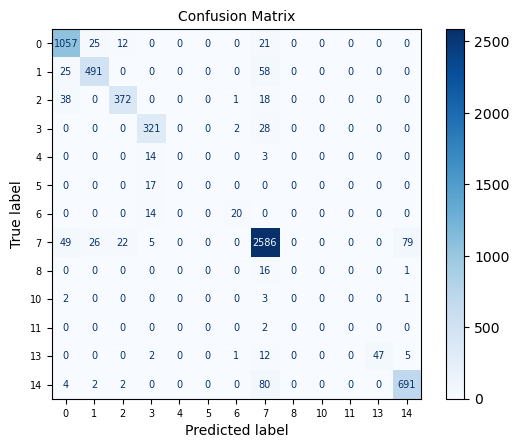

ROC AUC could not be calculated: Only one class present in y_true. ROC AUC score is not defined in that case.


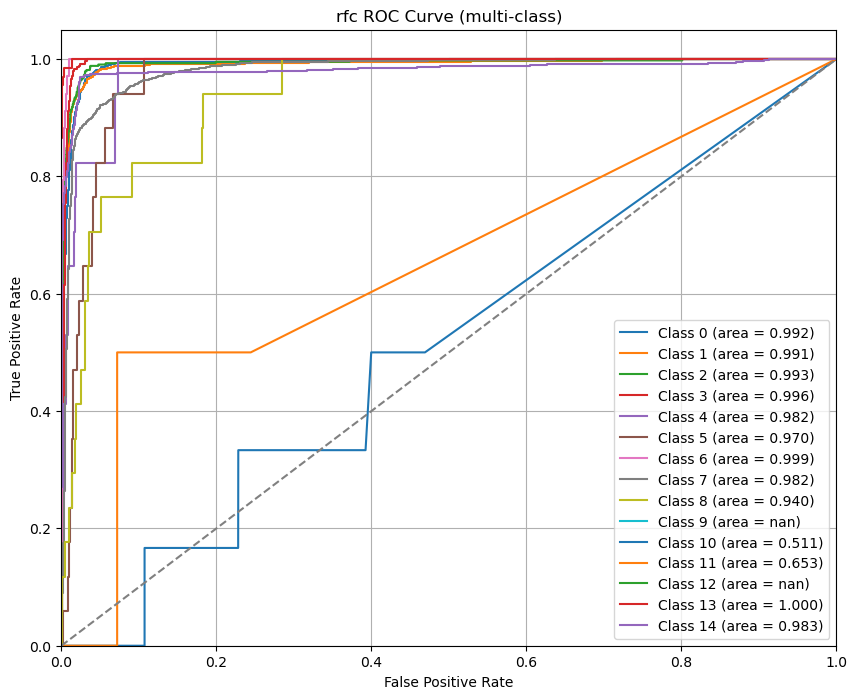

In [ ]:
import shap
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

# 모델 학습 및 저장
model = model_final(RandomForestClassifier, 'rfc', x_train, y_train, x_test, y_test, n_estimator=915, n_depth=43, n_split=11, n_leaf=1)

# SHAP 분석을 위한 explainer 생성
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# SHAP 값 플롯을 병렬로 처리하는 함수 정의
def plot_shap_for_class(i):
    print(f"Class {i} SHAP values:")
    shap.summary_plot(shap_values[i], x_test, show=False)  # 클래스별 SHAP 값 플롯
    plt.title(f"SHAP summary plot for class {i}")  # 클래스에 맞는 제목 추가
    plt.show()

# 병렬 처리로 각 클래스의 SHAP 값을 플롯
Parallel(n_jobs=-1)(delayed(plot_shap_for_class)(i) for i in range(len(shap_values)))